In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

sns.set()
%matplotlib inline
np.random.seed(5)

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)

In [2]:
# import the data

train = pd.read_csv('Train Dataset .csv')
test = pd.read_csv('Test Dataset.csv')
vd = pd.read_csv('Variable Definitions.csv')
submit = pd.read_csv('SampleSubmission.csv')

In [3]:
train.shape, test.shape

((7303, 15), (2697, 14))

In [4]:
#train2 = pd.read_csv('Train.csv')
#test2 = pd.read_csv('Test.csv')

#print(train2.shape, test2.shape)

In [5]:
# rename train columns to match those of the test dataset (Id, Age, Sex)

train.rename(columns = {'Age':'age', 'Sex':'sex', 'Id':'id'}, inplace = True)

In [6]:
# train = train.append(train2)
# train = train.append(test2)

# train.shape

In [7]:
train.head(10)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
5,13835,69,1,3,164,280,0,0,88,0,5.0,0,0,0,0
6,16226,44,0,2,134,129,0,0,71,1,5.2,0,3,3,1
7,19944,32,1,0,164,341,1,1,93,1,5.4,0,3,0,1
8,12028,36,0,0,199,198,1,2,151,1,2.2,2,0,0,1
9,18599,60,1,1,126,389,0,1,79,0,2.6,2,0,2,1


In [8]:
# train2[~train2['Id'].isin(train['id'])]

In [9]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [10]:
len(train['id'].unique())

7303

In [11]:
vd.head(100)

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,"resting electrocardiographic results (values 0,1,2)"
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise relative to rest


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [13]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
train['target'].value_counts()

1    5941
0    1362
Name: target, dtype: int64

In [15]:
test.shape

(2697, 14)

In [16]:
submit.shape

(2913, 2)

In [17]:
# Check for null values

train.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# check for duplicates

train.duplicated().sum()

0

# There are no duplicate rows as well as missing values

In [19]:
print(train.shape)

# check for duplicates in id
len(train['id'].unique())

(7303, 15)


7303

In [20]:
print(test.shape)

# check for duplicates in id
len(test['id'].unique())

(2697, 14)


2697

In [21]:
dict = {}
for i in list(train.columns):
    dict[i] = train[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,7303
age,49
sex,2
cp,4
trestbps,107
chol,439
fbs,2
restecg,3
thalach,132
exang,2


In [22]:
# # check correlation

# plt.figure(figsize=(20,20))
# sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [23]:
# plt.figure(figsize=(20,20))
# sns.clustermap(train.corr(), annot=True, cmap='coolwarm')

In [24]:
train.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [84]:
# #view profile report

# pp.ProfileReport(train)

id             AxesSubplot(0.125,0.712609;0.168478x0.167391)
age         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
sex         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
cp          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
trestbps       AxesSubplot(0.125,0.511739;0.168478x0.167391)
chol        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
fbs         AxesSubplot(0.529348,0.511739;0.168478x0.167391)
restecg     AxesSubplot(0.731522,0.511739;0.168478x0.167391)
thalach         AxesSubplot(0.125,0.31087;0.168478x0.167391)
exang        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
oldpeak      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
slope        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
ca                 AxesSubplot(0.125,0.11;0.168478x0.167391)
thal            AxesSubplot(0.327174,0.11;0.168478x0.167391)
target          AxesSubplot(0.529348,0.11;0.168478x0.167391)
dtype: object

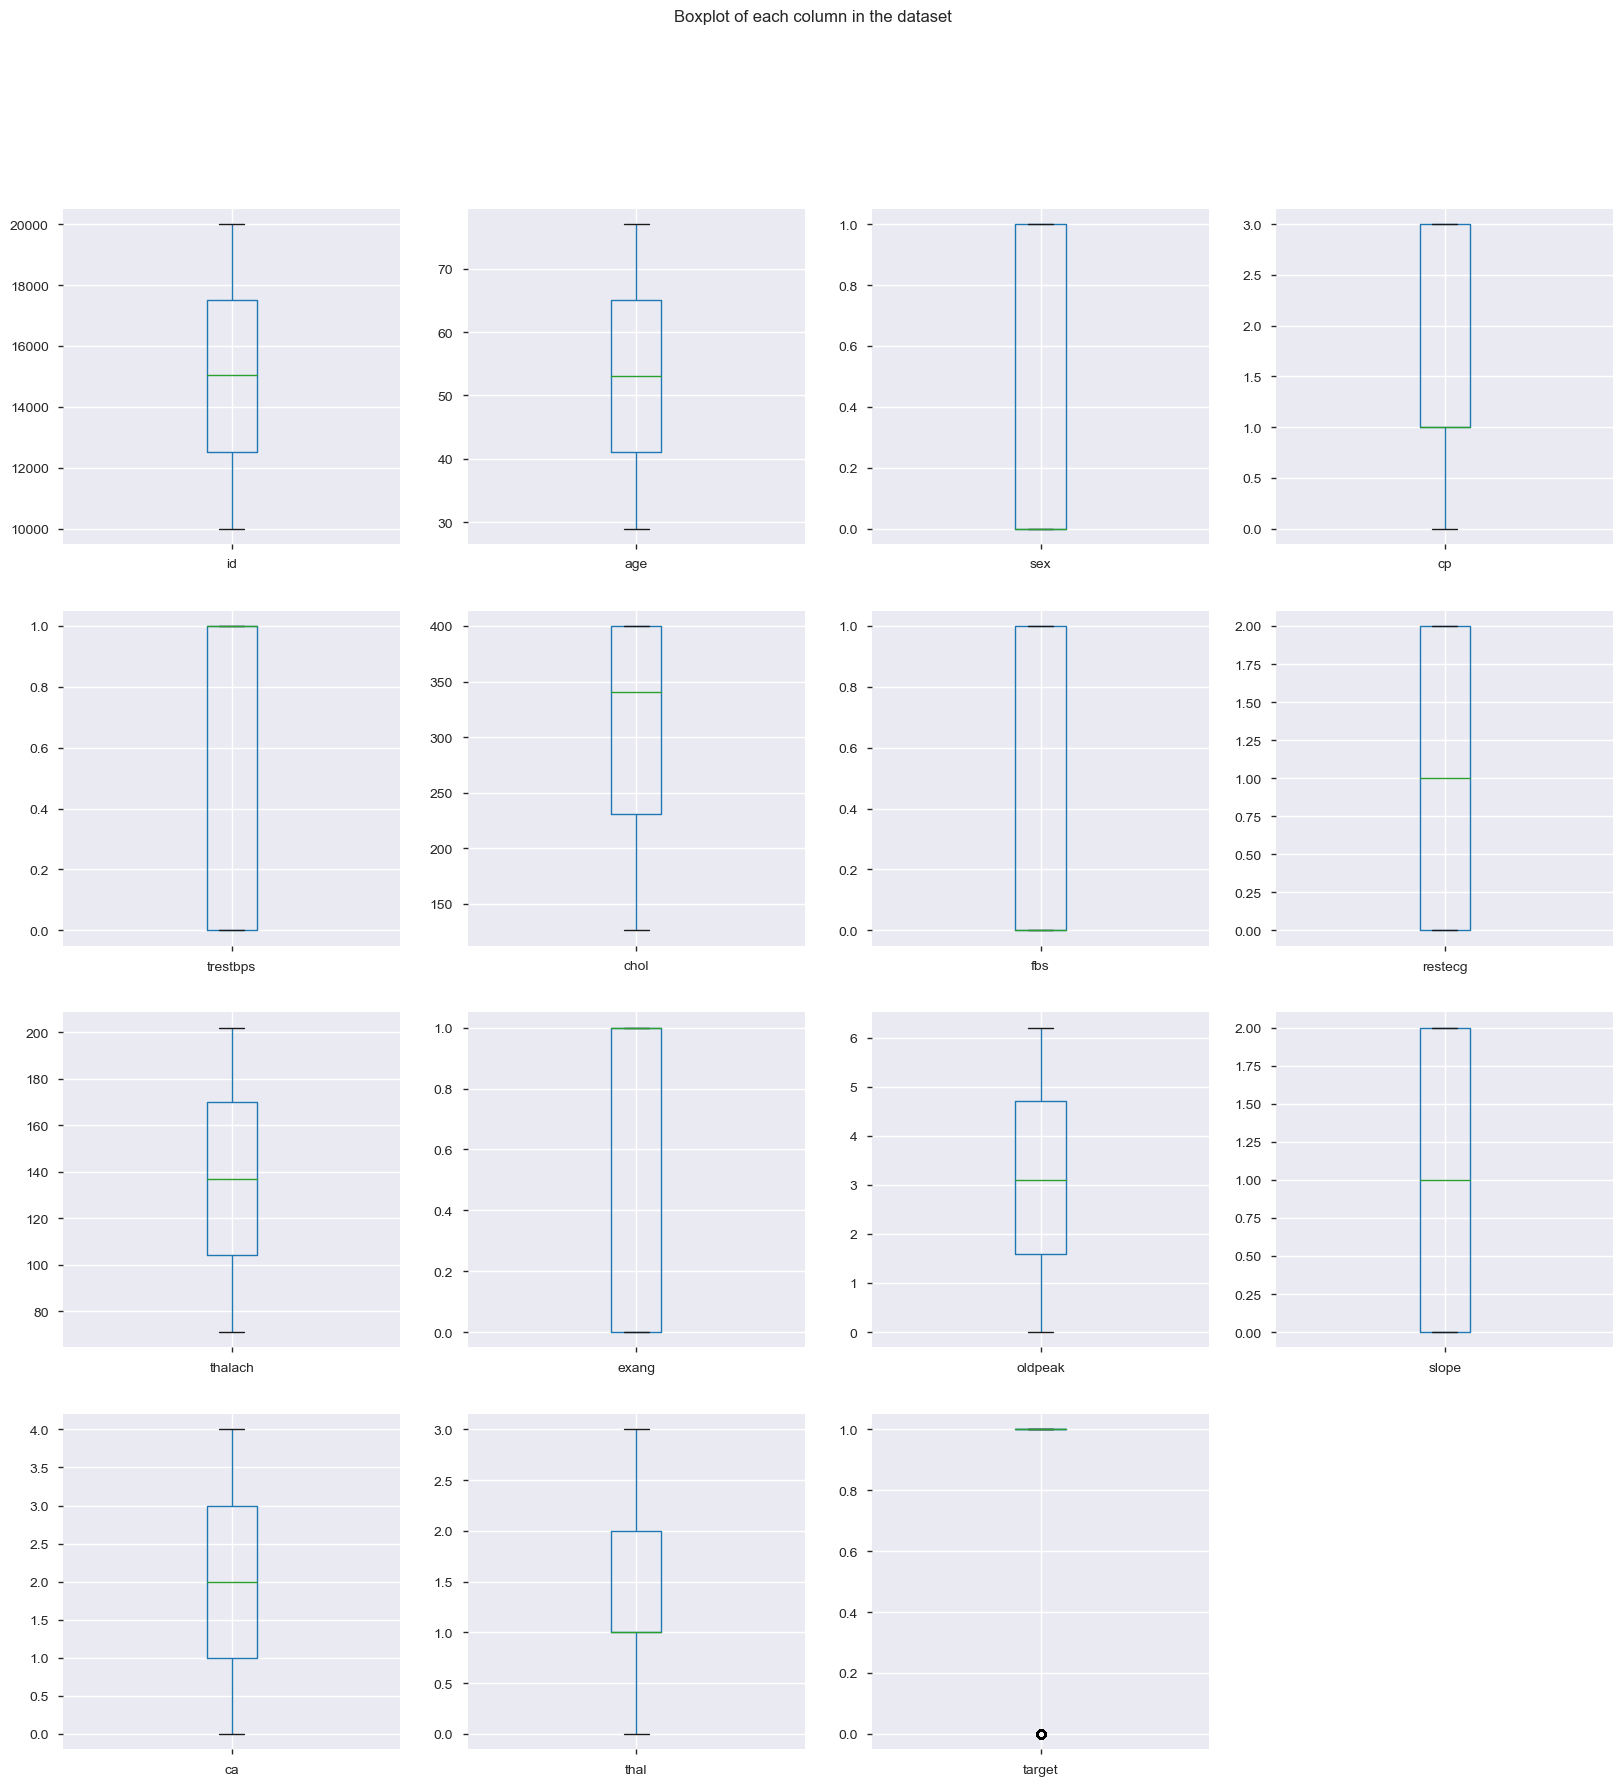

In [85]:
# box plot of the entire dataset to check for outliers

train.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(20, 20), title='Boxplot of each column in the dataset')

id             AxesSubplot(0.125,0.712609;0.168478x0.167391)
age         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
sex         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
cp          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
trestbps       AxesSubplot(0.125,0.511739;0.168478x0.167391)
chol        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
fbs         AxesSubplot(0.529348,0.511739;0.168478x0.167391)
restecg     AxesSubplot(0.731522,0.511739;0.168478x0.167391)
thalach         AxesSubplot(0.125,0.31087;0.168478x0.167391)
exang        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
oldpeak      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
slope        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
ca                 AxesSubplot(0.125,0.11;0.168478x0.167391)
thal            AxesSubplot(0.327174,0.11;0.168478x0.167391)
target          AxesSubplot(0.529348,0.11;0.168478x0.167391)
dtype: object

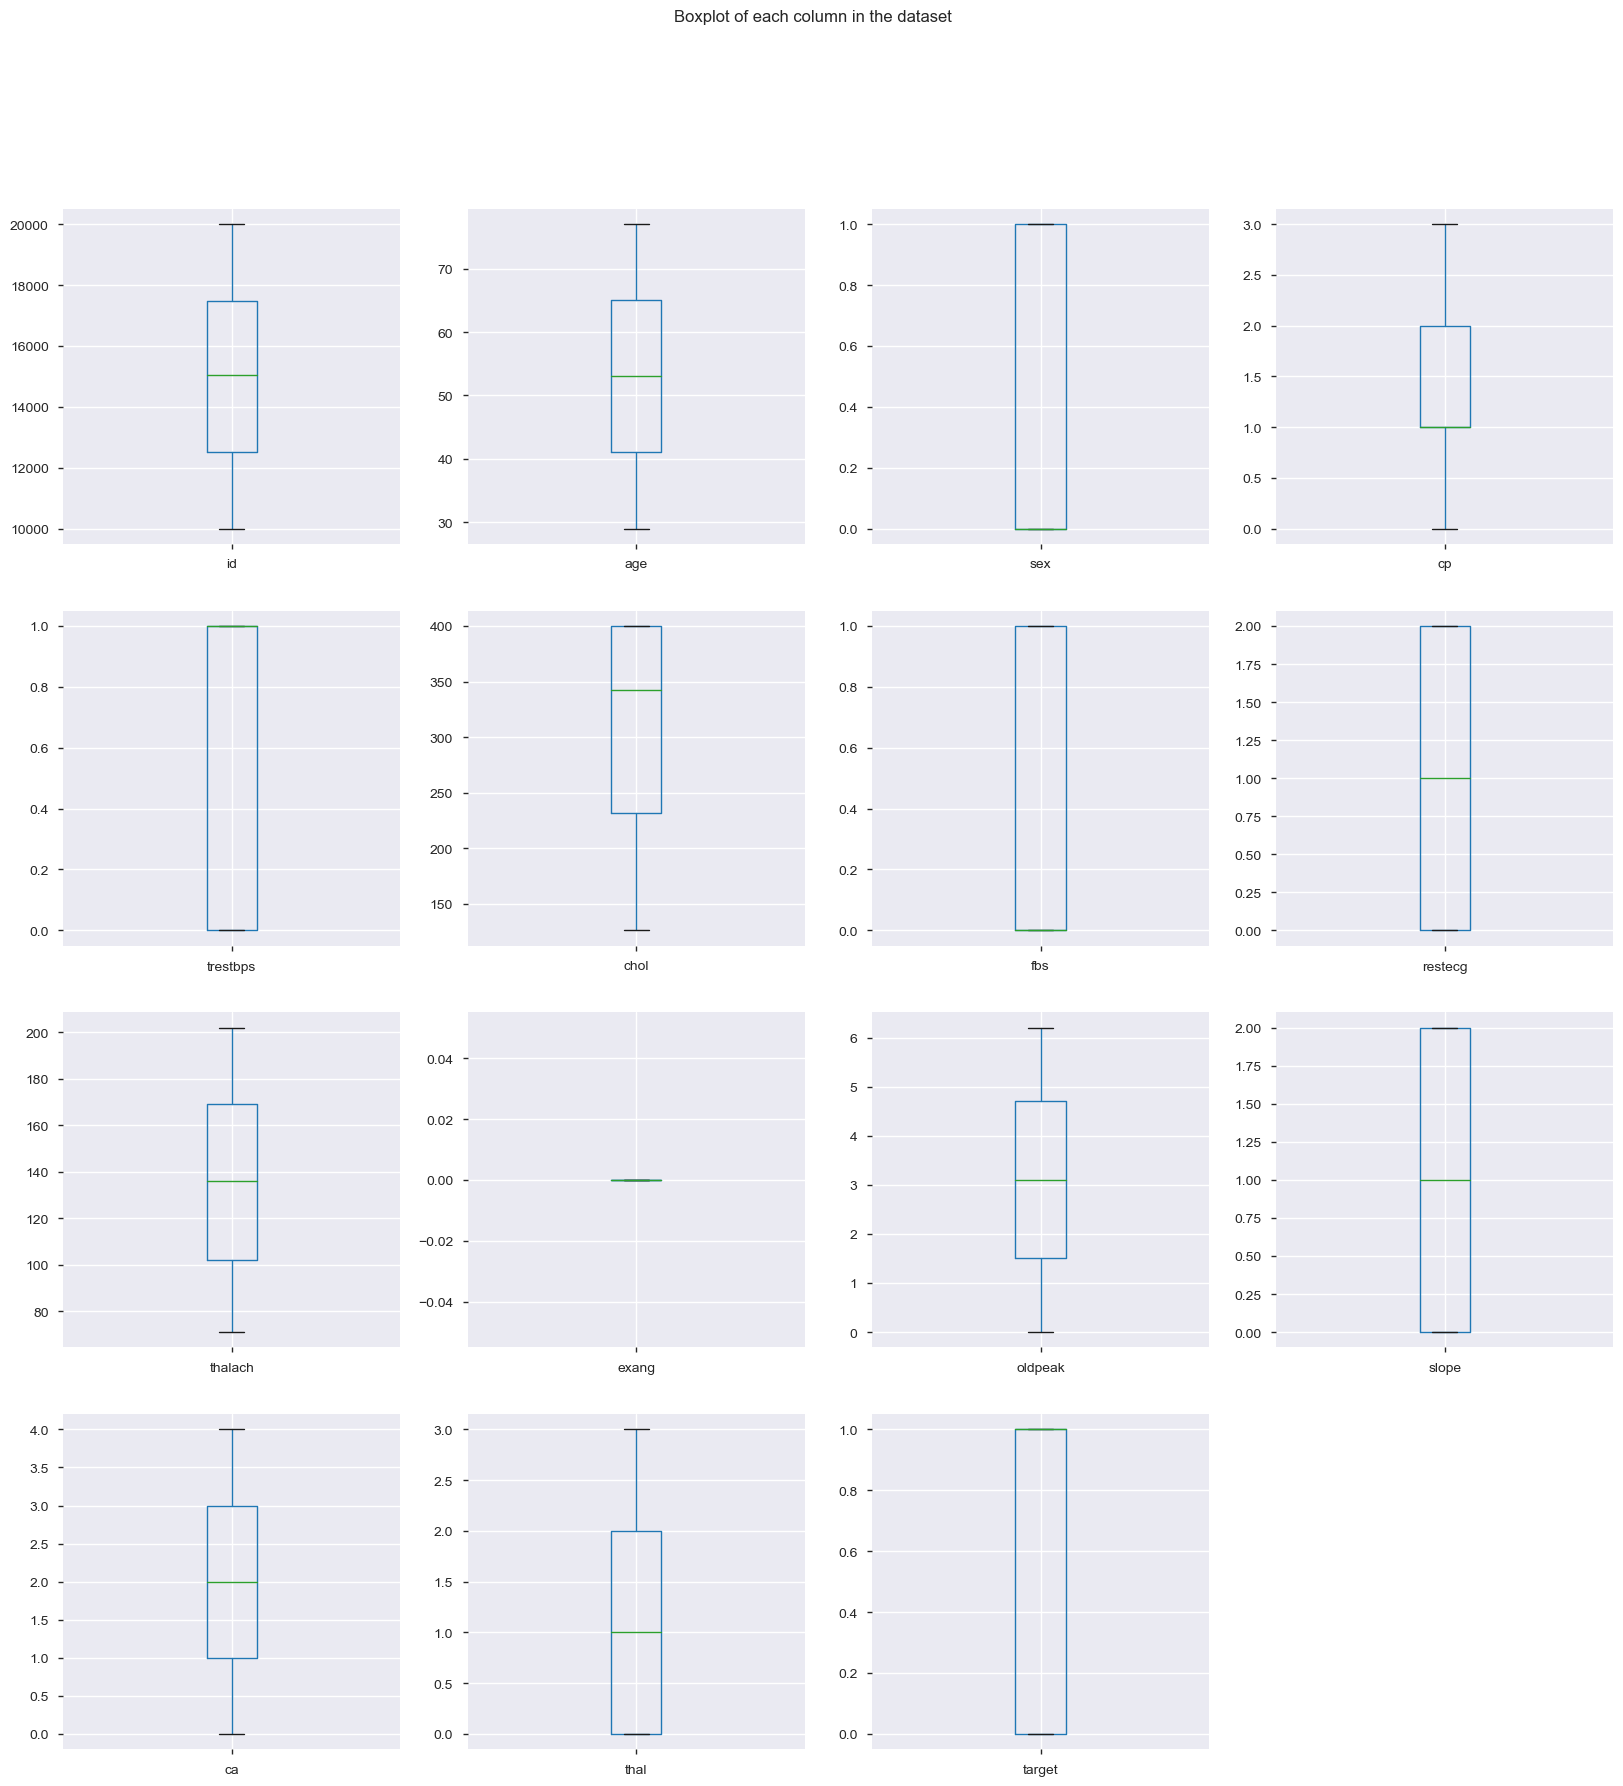

In [86]:
#  box plot of features where exang == 0

train[train['exang']==0].plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(20, 20), title='Boxplot of each column in the dataset')

id             AxesSubplot(0.125,0.712609;0.168478x0.167391)
age         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
sex         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
cp          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
trestbps       AxesSubplot(0.125,0.511739;0.168478x0.167391)
chol        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
fbs         AxesSubplot(0.529348,0.511739;0.168478x0.167391)
restecg     AxesSubplot(0.731522,0.511739;0.168478x0.167391)
thalach         AxesSubplot(0.125,0.31087;0.168478x0.167391)
exang        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
oldpeak      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
slope        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
ca                 AxesSubplot(0.125,0.11;0.168478x0.167391)
thal            AxesSubplot(0.327174,0.11;0.168478x0.167391)
target          AxesSubplot(0.529348,0.11;0.168478x0.167391)
dtype: object

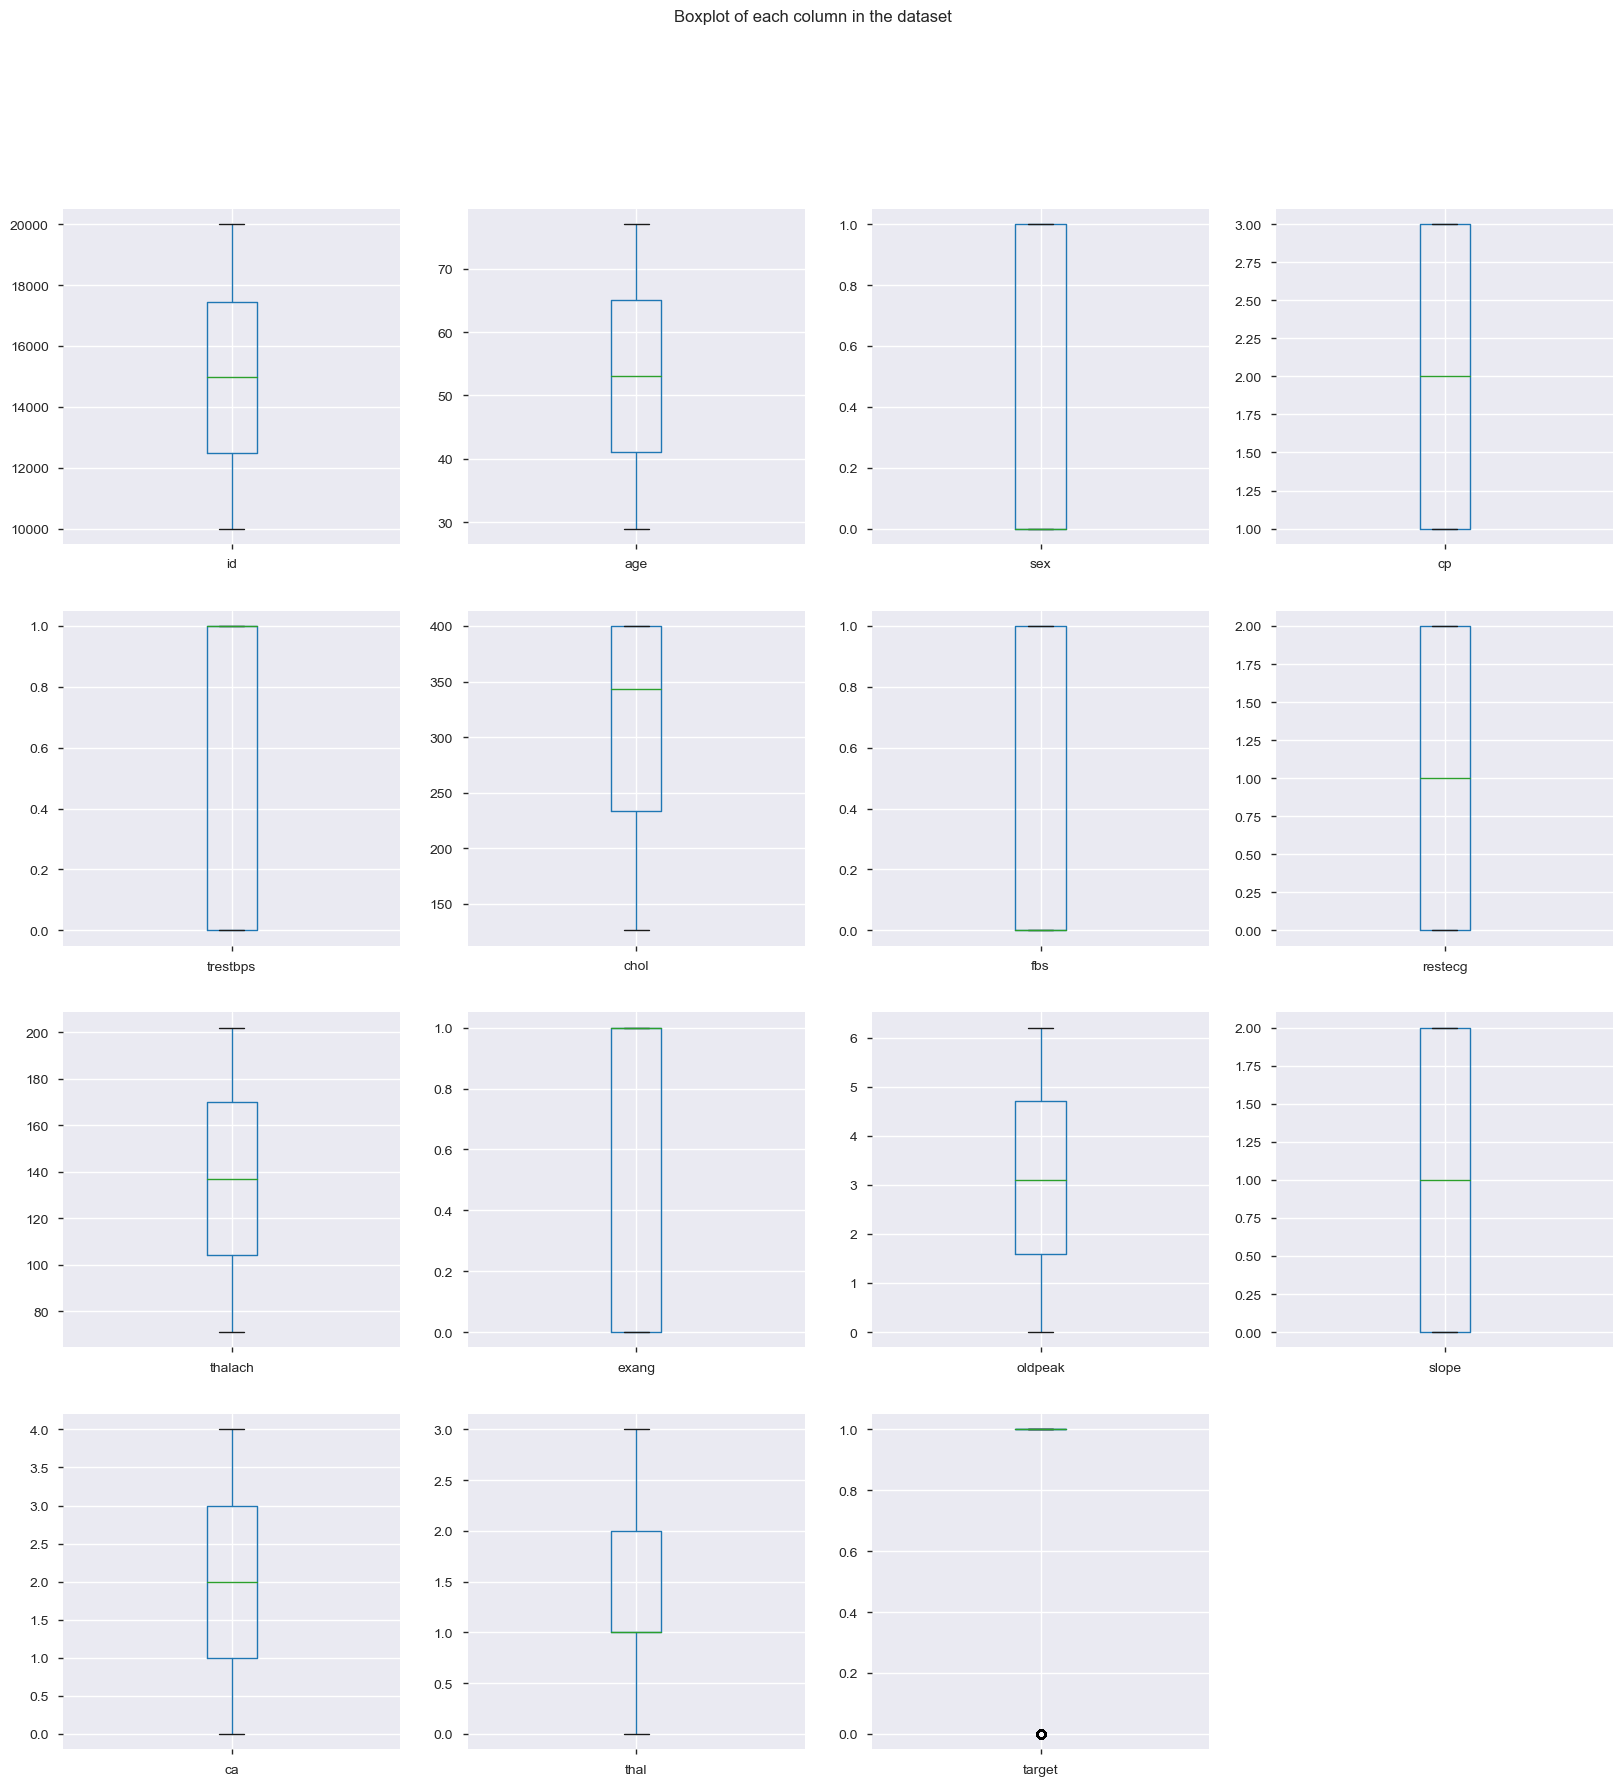

In [87]:
#  box plot of features where cp != 0

train[train['cp']!=0].plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(20, 20), title='Boxplot of each column in the dataset')

id             AxesSubplot(0.125,0.712609;0.168478x0.167391)
age         AxesSubplot(0.327174,0.712609;0.168478x0.167391)
sex         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
cp          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
trestbps       AxesSubplot(0.125,0.511739;0.168478x0.167391)
chol        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
fbs         AxesSubplot(0.529348,0.511739;0.168478x0.167391)
restecg     AxesSubplot(0.731522,0.511739;0.168478x0.167391)
thalach         AxesSubplot(0.125,0.31087;0.168478x0.167391)
exang        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
oldpeak      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
slope        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
ca                 AxesSubplot(0.125,0.11;0.168478x0.167391)
thal            AxesSubplot(0.327174,0.11;0.168478x0.167391)
target          AxesSubplot(0.529348,0.11;0.168478x0.167391)
dtype: object

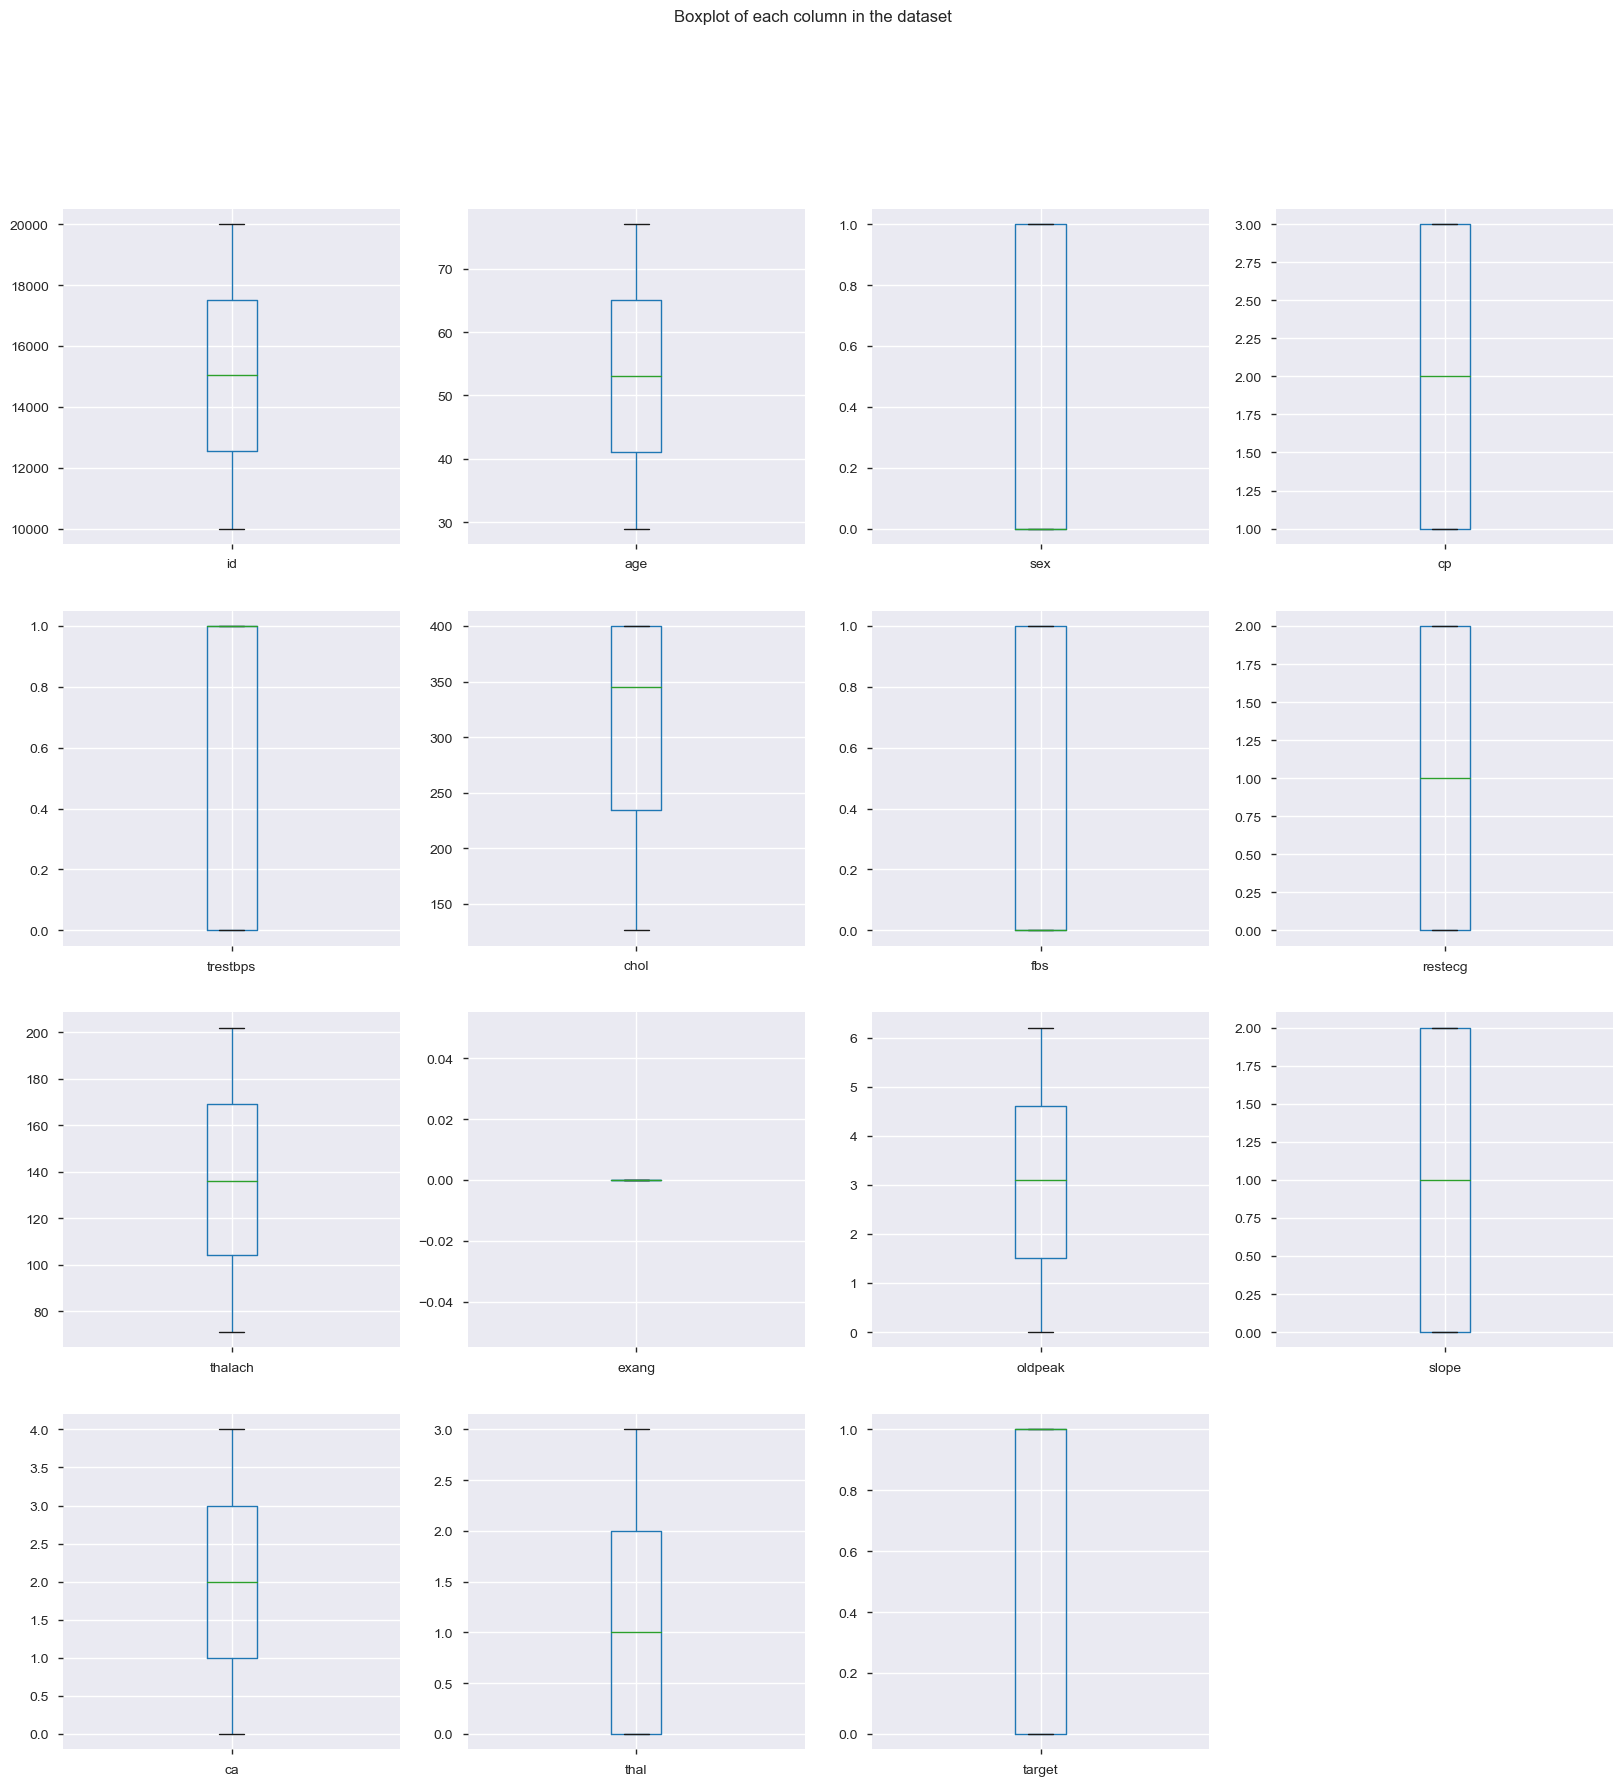

In [88]:
train[(train['cp']!=0) & (train['exang']==0)].plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(20, 20), title='Boxplot of each column in the dataset')

In [30]:
train[(train['cp']!=0) & (train['exang']==0)].shape

(2746, 15)

In [31]:
train[(train['cp']!=0) & (train['exang']==0)]['target'].value_counts()

1    1384
0    1362
Name: target, dtype: int64

In [32]:
train[(train['cp']!=0) & (train['exang']==0)].corr()['target'].sort_values()

thalach    -0.018067
age        -0.012453
oldpeak    -0.010228
thal       -0.010002
fbs        -0.007053
trestbps   -0.004382
slope      -0.002525
chol       -0.001572
ca         -0.000245
restecg     0.004017
cp          0.008386
id          0.016589
sex         0.023654
target      1.000000
exang            NaN
Name: target, dtype: float64

In [33]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
# # Fixing continuous variables
# # High bp starts from 140
# # chol with above 400 is abnormal
# # 
# cont = ['trestbps', 'chol', 'thalach','oldpeak']

train['trestbps'] = train['trestbps'].apply(lambda x: 1 if x >=140 else 0)
train['chol'] = train['chol'].apply(lambda x: 400 if x >=400 else x)
# train['thalach'] = train['thalach'].apply(lambda x: x if x <150 else 150)
# train['oldpeak'] = train['oldpeak'].apply(lambda x: x/10)



test['trestbps'] = test['trestbps'].apply(lambda x: 1 if x >=140 else 0)
test['chol'] = test['chol'].apply(lambda x: 400 if x >=400 else x)
# test['thalach'] = test['thalach'].apply(lambda x: x if x <150 else 150)
# test['oldpeak'] = test['oldpeak'].apply(lambda x: x/10)


# def tres(x):
#     if x >= 90 and x <= 120:
#         return 0
#     elif x > 120 and x <= 129:
#         return 1
#     elif x > 129 and x <= 139:
#         return 2
#     elif x > 139:
#         return 3
    
# def chol(x):
#     if x < 200:
#         return 0
#     elif x >= 200 and x <= 239:
#         return 1
#     elif x > 239 and x <= 400:
#         return 2
#     elif x > 400:
#         return 3
    

# train['trestbps'] = train['trestbps'].apply(tres)
# train['chol'] = train['chol'].apply(chol)

# test['trestbps'] = test['trestbps'].apply(tres)
# test['chol'] = test['chol'].apply(chol)
# train.info()

# We can observe 2 things from the 2 cells above
- When the target is 0, exang is always 0
- When the target is 0, the minimum value of cp is 1

In [35]:
train[train['exang']==1]['target'].value_counts()

1    3675
Name: target, dtype: int64

In [36]:
train[train['cp']==0]['target'].value_counts()

1    1802
Name: target, dtype: int64

In [37]:
# # Fixing continuous variables

# cont = ['trestbps', 'chol', 'thalach','oldpeak']

# train['trestbps'] = train['trestbps'].apply(lambda x: x/1000)
# train['chol'] = train['chol'].apply(lambda x: x/1000)
# train['thalach'] = train['thalach'].apply(lambda x: x/1000)
# train['oldpeak'] = train['oldpeak'].apply(lambda x: x/10)


# test['trestbps'] = test['trestbps'].apply(lambda x: x/1000)
# test['chol'] = test['chol'].apply(lambda x: x/1000)
# test['thalach'] = test['thalach'].apply(lambda x: x/1000)
# test['oldpeak'] = test['oldpeak'].apply(lambda x: x/10)


# train.info()

In [38]:
train.corr()['target'].sort_values()

cp         -0.198082
ca         -0.008244
chol       -0.007609
thalach    -0.004634
age        -0.002846
slope       0.001909
fbs         0.003925
oldpeak     0.004899
thal        0.005709
restecg     0.005911
id          0.006148
trestbps    0.014075
sex         0.030608
exang       0.481897
target      1.000000
Name: target, dtype: float64

In [39]:
# # new features

# # train['new'] = train['cp'] * train['exang']
# train['new'] = train['cp'] * train['exang'] * train['age'] * train['sex']
# #train['new2'] = train['fbs'] + train['exang'] + train['thal']
# #train['new2'] = train['new2'].apply(lambda x: 0 if x == 0 else x)
# # test['new'] = test['cp'] * test['exang']
# test['new'] = test['cp'] * test['exang'] * test['age'] * test['sex']
# #test['new2'] = test['fbs'] + test['exang'] + test['thal']
# #test['new2'] = test['new2'].apply(lambda x: 0 if x == 0 else x)

In [40]:
# # # expanding the categorical columns
# # # ['cp', 'restecg', 'slope', 'ca', 'thal']

# train['cp'] = train['cp'].apply(lambda x: str(x))
# # train['restecg'] = train['restecg'].apply(lambda x: str(x))
# # train['slope'] = train['slope'].apply(lambda x: str(x))
# # train['ca'] = train['ca'].apply(lambda x: str(x))
# train['thal'] = train['thal'].apply(lambda x: str(x))

# test['cp'] = test['cp'].apply(lambda x: str(x))
# # test['restecg'] = test['restecg'].apply(lambda x: str(x))
# # test['slope'] = test['slope'].apply(lambda x: str(x))
# # test['ca'] = test['ca'].apply(lambda x: str(x))
# test['thal'] = test['thal'].apply(lambda x: str(x))


# # # train['cp'] = train['cp'].apply(lambda x: str(x))
# # # test['cp'] = test['cp'].apply(lambda x: str(x))

# # # expanding the categorical columns

# train = pd.get_dummies(train)
# test = pd.get_dummies(test)

# # train.info()

In [41]:
train.corr()['target'].sort_values()

cp         -0.198082
ca         -0.008244
chol       -0.007609
thalach    -0.004634
age        -0.002846
slope       0.001909
fbs         0.003925
oldpeak     0.004899
thal        0.005709
restecg     0.005911
id          0.006148
trestbps    0.014075
sex         0.030608
exang       0.481897
target      1.000000
Name: target, dtype: float64

In [42]:
# # undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

# from sklearn.ensemble import IsolationForest
# from sklearn.covariance import EllipticEnvelope
# from sklearn.neighbors import LocalOutlierFactor

# # samp = RandomUnderSampler(random_state=5, sampling_strategy=0.5)
# # X, y = samp.fit_resample(X, y)
# # X.shape, test2.shape

# # train2 = train[train['target']==1].copy()
# # train3 = train[train['target']==0].copy()
# # print(train2.shape, train3.shape)

# train2 = train.copy()
# print(train2.shape)

# out = LocalOutlierFactor()
# yhat = out.fit_predict(train2.drop('target', axis=1))
# train2['mask'] = yhat
# train2 = train2[train2['mask']!= 1]
# #print(train2.shape, train3.shape)

# #train2 = train2.append(train3)

# print(train2.shape)



In [43]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,1,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,1,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,0,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,0,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,0,400,1,1,166,1,0.9,2,4,0,1


In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
# Use only where cp !=0 for training data
#train2 = train[train['cp']!=0].copy()
# Use only where new2 ==0 for training data
#train2 = train[train['new2']=0].copy()
# Spliting the train data set

cat = ['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont = ['age', 'chol', 'thalach','oldpeak']

sc = RobustScaler()
#sc = LinearDiscriminantAnalysis(n_components=2)
#train2 = train[(train['cp']!=0) & (train['exang']==0)].copy()
#train2 = train[train['thal']!=3].copy()

X = train.drop(['target', 'id'], axis=1).copy()
y = train['target'].copy()


# samp = RandomUnderSampler(random_state=5)
# X, y = samp.fit_resample(X, y)

test2 = test.drop(['id'], axis=1).copy()
print(X.shape, test2.shape)

comb = X.append(test2).copy()
# print(comb.shape)
# print(comb.iloc[0:7303, :].shape)
# print(comb.iloc[7303:, :].shape)

sc.fit(comb[cont])

X[cont] = sc.transform(X[cont]).copy()
test2[cont] = sc.transform(test2[cont]).copy()

print(X.shape, test2.shape)

# # encoding the categorical columns
# X = pd.get_dummies(X, columns = cat, drop_first = True)
# test2 = pd.get_dummies(test2, columns = cat, drop_first = True)

km = KMeans(n_clusters=5)
comb = X.append(test2).copy()

km.fit(comb)

X['cluster'] = km.predict(X)
test2['cluster'] = km.predict(test2)
print(X.shape, test2.shape)

(7303, 13) (2697, 13)
(7303, 13) (2697, 13)
(7303, 14) (2697, 14)


In [45]:
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,1,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,1,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,0,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,0,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,0,400,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,0,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,0,400,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,1,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,1,287,1,2,161,1,3.4,1,1,0,1


In [46]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cluster
0,-0.80,0,1,1,-0.812500,1,0,0.253731,0,-0.516129,1,4,1,4
1,0.00,1,2,1,-1.116071,0,1,-0.492537,0,-0.741935,2,1,0,3
2,-0.64,1,2,0,-0.830357,1,0,0.268657,0,-0.322581,1,3,1,4
3,0.88,0,0,0,-0.211310,1,2,-0.731343,1,0.580645,0,2,2,2
4,-0.72,1,2,0,0.348214,1,1,0.432836,1,-0.709677,2,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,-0.92,1,2,0,-0.979167,1,2,-0.268657,0,-0.129032,1,0,0,3
7299,-0.44,1,2,0,0.348214,1,2,-0.910448,0,-0.387097,2,3,2,0
7300,-0.08,1,0,1,-1.050595,1,0,0.791045,1,-0.709677,0,0,2,2
7301,-0.96,0,0,1,-0.324405,1,2,0.358209,1,0.096774,1,1,0,3


In [47]:
train['target'].value_counts()

1    5941
0    1362
Name: target, dtype: int64

In [48]:
# Model Building

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from rgf.sklearn import RGFClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier

# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

# ensemble
from sklearn.ensemble import VotingClassifier

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [50]:
# # RandomForest

# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [51]:
# # RandomForest unbalanced

# rf = DecisionTreeClassifier(random_state=42,max_depth=4, min_samples_leaf=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [52]:
# # RandomForest unbalanced

# rf = RandomForestClassifier(random_state=42, max_leaf_nodes=950, max_features=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [53]:
# # logistic regression

# rf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)
# rf.fit(X_train, y_train)
# predx = rf.predict_proba(X_test)
# predx = np.argmax(predx,axis=1)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [54]:
# # catboost classifier

# rf = CatBoostClassifier(n_estimators=100, random_state=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))

# print(classification_report(y_test, predx))

In [55]:
from mlxtend.classifier import StackingCVClassifier
lr = LogisticRegression()
nb = GaussianNB()
xgb = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
svc = SVC(random_state=5, C=1)
knn = KNeighborsClassifier(n_neighbors=10)


scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= xgb,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[  40  232]
 [  51 1138]]


Accuracy of StackingCVClassifier: 80.62970568104039 

              precision    recall  f1-score   support

           0       0.44      0.15      0.22       272
           1       0.83      0.96      0.89      1189

    accuracy                           0.81      1461
   macro avg       0.64      0.55      0.55      1461
weighted avg       0.76      0.81      0.76      1461



In [56]:
# xgboost classifier

rf = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
rf.fit(X, y)
predx = rf.predict(X)
print(accuracy_score(y, predx))
print(classification_report(y, predx))

0.8495138983979187
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1362
           1       0.89      0.92      0.91      5941

    accuracy                           0.85      7303
   macro avg       0.75      0.72      0.74      7303
weighted avg       0.84      0.85      0.84      7303



In [57]:
# xgboost classifier

rf = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
rf.fit(X_train, y_train)
predx = rf.predict_proba(X_test)
predx = np.argmax(predx,axis=1)
#predx = [np.round(x[1]) for x in predx]
print(accuracy_score(y_test, predx))
print(classification_report(y_test, predx))

0.8090349075975359
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       272
           1       0.88      0.89      0.88      1189

    accuracy                           0.81      1461
   macro avg       0.68      0.68      0.68      1461
weighted avg       0.81      0.81      0.81      1461



In [58]:
# # xgboost classifier

# rf = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
#                     reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
# rf.fit(X_train, y_train)
# predx = rf.predict_proba(X_test)
# predx = np.argmax(predx,axis=1)
# #predx = [np.round(x[1]) for x in predx]
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [59]:
# rf =  MLPClassifier(max_iter=1000)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [60]:
# # xgboost classifier

# rf = XGBClassifier(n_estimators=1000, learning_rate=0.00001, max_depth=3, random_state=5)
# rf.fit(X, y, 
#           eval_set=[(X_test, y_test)], 
#           early_stopping_rounds=10, 
#           verbose=True)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [61]:
# from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier

# rf = BalancedRandomForestClassifier(random_state=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [62]:
# rf = BalancedBaggingClassifier(random_state=5, n_estimators=100)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [63]:


# rf = EasyEnsembleClassifier(random_state=5, n_estimators=100)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))


In [64]:
# # lgbm classifier

# rf = LGBMClassifier(n_estimators=100, random_state=5, max_depth=10)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [65]:
# # RGF classifier

# rf = RGFClassifier(max_leaf =10, n_jobs=-1, verbose=5, algorithm='RGF_Sib')
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [66]:
# # SVC classifier

# rf = SVC(random_state=5, C=2,kernel='rbf')
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [67]:
# # GradientBoostingClassifier

# rf = GradientBoostingClassifier(random_state=5)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [68]:
# # NB Classifier

# rf = GaussianNB()
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [69]:
# # KNN Classifier
# rf = KNeighborsClassifier(n_neighbors=300)
# rf.fit(X_train, y_train)
# predx = rf.predict(X_test)
# print(accuracy_score(y_test, predx))
# print(classification_report(y_test, predx))

In [70]:
# # Voting Clasifier

# def model_score(model):
#     rtr = model.predict(X_train)
#     rte = model.predict(X_test)
    
#     train_acc = accuracy_score(y_train, rtr)
#     test_acc = accuracy_score(y_test, rte)
#     print('Training data ACC: {} \t Validation ACC: {}'.format(train_acc, test_acc))
#     return test_acc

# xg = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
# kn = KNeighborsClassifier(n_neighbors=2)
# gb = GaussianNB()
# rf = RandomForestClassifier(random_state=42, max_depth=10)
# lg = LogisticRegression(max_iter=1000)
# svc = SVC(random_state=5, kernel='sigmoid')



# rf = VotingClassifier(estimators=[('xg', xg), ('kn', kn), ('gb', gb), ('rf', rf), ('lg', lg), ('svc', svc)], n_jobs=-1, verbose=True, voting='hard')

# kf = StratifiedKFold(n_splits=5, shuffle=False)
# scores, preds = [], []
# j = 1

# #ct = CatBoostClassifier(n_estimators = 100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5, use_best_model=True)

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     rf.fit(X_train, y_train)

#     print(f'Split trained: {j}')

#     score = model_score(rf)
#     pred = rf.predict(test2)  # prediction of the test data
    
#     scores.append(score)
#     preds.append(pred)
#     j += 1

# print(np.mean(scores))

# predict = np.mean(preds, axis=0)

In [71]:
# Voting Clasifier 2
def chang(y):
    new = []
    for x in y:
        if x > 0.5:
            new.append(1)
        else:
            new.append(0)
    return new


def model_score(model):
    rtr = model.predict(X_train)
    rte = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, rtr)
    test_acc = accuracy_score(y_test, rte)
    print('Training data ACC: {} \t Validation ACC: {}'.format(train_acc, test_acc))
    return test_acc

# xg = XGBClassifier(n_estimators=1000, learning_rate=0.00001, max_depth=3, random_state=5)
# cb = EasyEnsembleClassifier(random_state=5, n_estimators=100)
# gb = RGFClassifier(max_leaf =10, n_jobs=-1, verbose=5, algorithm='RGF_Sib')
# brf = BalancedBaggingClassifier(random_state=5, n_estimators=100)
# dt = LogisticRegression(max_iter=10000)
#rf = VotingClassifier(estimators=[('xg', xg), ('cb', cb), ('gb', gb), ('brf', brf), ('dt', dt)], n_jobs=-1, verbose=True, voting='soft')
#rf = DecisionTreeClassifier(random_state=42,max_depth=4)
# xgb = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)
# svc = SVC(random_state=5)
# ran = RandomForestClassifier(random_state=42, max_leaf_nodes=950, max_features=5, max_samples=2400)
# gb = RGFClassifier(max_leaf =10, n_jobs=-1, verbose=5, algorithm='RGF_Sib')
# dt = LogisticRegression(max_iter=10000)
# knn = KNeighborsClassifier(n_neighbors=10)
# brf = BalancedBaggingClassifier(random_state=5, n_estimators=100)
# gg = GradientBoostingClassifier(random_state=5)
#mlp = MLPClassifier(max_iter=1000)
# rf = StackingCVClassifier(classifiers=[xgb,xgb,xgb, xgb, xgb, xgb],meta_classifier= xgb,random_state=42)

#rf = XGBClassifier(n_estimators=100, random_state=5, max_depth=3)

#rf = DecisionTreeClassifier()
rf = SVC(C=3,  random_state=5)

kf = StratifiedKFold(n_splits=3, shuffle=False)
scores, preds = [], []
j = 1

#ct = CatBoostClassifier(n_estimators = 100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5, use_best_model=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # rf.fit(X_train, y_train, 
    #       eval_set=[(X_test, y_test)], 
    #       early_stopping_rounds=10, 
    #       verbose=True)
    rf.fit(X_train, y_train)

    print(f'Split trained: {j}')

    score = model_score(rf)
    pred = rf.predict(test2)  # prediction of the test data
    #pred = np.argmax(pred,axis=1)
    #pred = [x[1] for x in pred]
    
    scores.append(score)
    preds.append(pred)
    j += 1

print(np.mean(scores))

predict = np.mean(preds, axis=0)

Split trained: 1
Training data ACC: 0.8128594905505341 	 Validation ACC: 0.8164271047227926
Split trained: 2
Training data ACC: 0.8155678784144588 	 Validation ACC: 0.8097781429745275
Split trained: 3
Training data ACC: 0.813719449578969 	 Validation ACC: 0.8155299917830732
0.8139117464934644


In [72]:
# # full training data

# # xgboost classifier

# rf = XGBClassifier(n_estimators=100, random_state=5, max_depth=6)
# rf.fit(X, y)

In [73]:
# # RFECV

# kf = StratifiedKFold(n_splits=5, shuffle=False)

# rf = RFECV(XGBClassifier(n_estimators=100, random_state=5, max_depth=3), cv=kf, n_jobs=1, scoring='accuracy', min_features_to_select=2, verbose=5)

# rf.fit(X, y)

In [74]:
# rf.support_

In [75]:
# rf.n_features_

In [76]:
# X.columns

In [77]:
# submission

def chang2(x):
    if x > 0.67:
        return 1
    else:
        return 0

#predict  = rf.predict(test2)

test3 = test.copy()

test3['target'] = predict


submit = test3[['id', 'target']].copy()

submit['target'] = submit['target'].apply(lambda x: int(np.round(x)))

submit.to_csv('Submission300.csv', index=False)

In [78]:
submit['target'].value_counts()

1    2352
0     345
Name: target, dtype: int64

In [79]:
# best score so far 0.945679012, 2170 1s and 527 0s

submit['target'].value_counts()

1    2352
0     345
Name: target, dtype: int64

In [80]:
# best score for new dataset 0.837037037 (2160, 537), train score is 0.8073384299651808

submit['target'].value_counts()

1    2352
0     345
Name: target, dtype: int64

In [81]:
# target value should have 2170 1s and 527 0s

In [82]:
#Missing entries for IDs 13659, 19218, 18915, 19601, and 18355